# DNN - NSL

In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [17]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.decomposition import PCA
from tensorflow.keras import regularizers
from tensorflow.keras import Model, layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,confusion_matrix,f1_score


In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
def load_train_dataset():
    df_train = pd.read_csv('NSL_train-set.csv')
    
    limit = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit]
    Y_train = df_train.iloc[:,limit]
    
    return X_train, Y_train, df_train

X_train, Y_train, df_train = load_train_dataset()

In [5]:
def load_test_dataset():
    df_test = pd.read_csv('NSL_test-set.csv')

    limit = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit]
    Y_test = df_test.iloc[:,limit]
    
    return X_test, Y_test, df_test

X_test, Y_test, df_test = load_test_dataset()

In [6]:
METRICS = [ 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    verbose=1,
    patience=5,
    mode='max',
    restore_best_weights=True)

In [8]:
def neural_network(optimizer='sgd', init='glorot_uniform'):
    #Neural Network Model
    model = Sequential()
    model.add(Dense(256, input_dim=77, activation='relu', kernel_initializer=init, bias_initializer='zeros'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = METRICS)
    
    return model


In [9]:
estimator = KerasClassifier(build_fn=neural_network)
estimator.fit(X_train,Y_train,verbose=1,callbacks=[early_stopping], epochs=200,validation_split=0.2, batch_size=128)


Train on 91459 samples, validate on 22865 samples
Epoch 1/200
91459/91459 [==============================] - 5s 55us/step - loss: 0.3224 - accuracy: 0.7404 - precision: 0.8687 - recall: 0.3222 - auc: 0.8610 - val_loss: 0.1564 - val_accuracy: 0.8704 - val_precision: 0.9816 - val_recall: 0.7174 - val_auc: 0.9587
Epoch 2/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0829 - accuracy: 0.9052 - precision: 0.9854 - recall: 0.8095 - auc: 0.9721 - val_loss: 0.1225 - val_accuracy: 0.9252 - val_precision: 0.9872 - val_recall: 0.8527 - val_auc: 0.9792
Epoch 3/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0691 - accuracy: 0.9356 - precision: 0.9884 - recall: 0.8764 - auc: 0.9824 - val_loss: 0.1159 - val_accuracy: 0.9432 - val_precision: 0.9891 - val_recall: 0.8921 - val_auc: 0.9846
Epoch 4/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0625 - accuracy: 0.9482 - precision: 0.9897 - recall: 0.9028 - auc: 0.9861 - val_l

Epoch 32/200
91459/91459 [==============================] - 5s 50us/step - loss: 0.0228 - accuracy: 0.9830 - precision: 0.9939 - recall: 0.9718 - auc: 0.9979 - val_loss: 0.0983 - val_accuracy: 0.9830 - val_precision: 0.9939 - val_recall: 0.9719 - val_auc: 0.9979
Epoch 33/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0235 - accuracy: 0.9831 - precision: 0.9939 - recall: 0.9720 - auc: 0.9979 - val_loss: 0.0243 - val_accuracy: 0.9832 - val_precision: 0.9939 - val_recall: 0.9722 - val_auc: 0.9979
Epoch 34/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0214 - accuracy: 0.9833 - precision: 0.9940 - recall: 0.9724 - auc: 0.9980 - val_loss: 0.0435 - val_accuracy: 0.9834 - val_precision: 0.9940 - val_recall: 0.9726 - val_auc: 0.9980
Epoch 35/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0225 - accuracy: 0.9835 - precision: 0.9940 - recall: 0.9728 - auc: 0.9980 - val_loss: 0.0238 - val_accuracy: 0.9837 - val_preci

91459/91459 [==============================] - 5s 51us/step - loss: 0.0151 - accuracy: 0.9875 - precision: 0.9950 - recall: 0.9800 - auc: 0.9987 - val_loss: 0.0184 - val_accuracy: 0.9876 - val_precision: 0.9950 - val_recall: 0.9801 - val_auc: 0.9987
Epoch 64/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0155 - accuracy: 0.9876 - precision: 0.9951 - recall: 0.9801 - auc: 0.9987 - val_loss: 0.0276 - val_accuracy: 0.9877 - val_precision: 0.9951 - val_recall: 0.9802 - val_auc: 0.9987
Epoch 65/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0168 - accuracy: 0.9877 - precision: 0.9951 - recall: 0.9803 - auc: 0.9987 - val_loss: 0.0421 - val_accuracy: 0.9878 - val_precision: 0.9951 - val_recall: 0.9804 - val_auc: 0.9987
Epoch 66/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0145 - accuracy: 0.9878 - precision: 0.9951 - recall: 0.9804 - auc: 0.9987 - val_loss: 0.0287 - val_accuracy: 0.9879 - val_precision: 0.9951 

91459/91459 [==============================] - 5s 53us/step - loss: 0.0107 - accuracy: 0.9897 - precision: 0.9957 - recall: 0.9837 - auc: 0.9990 - val_loss: 0.0190 - val_accuracy: 0.9898 - val_precision: 0.9957 - val_recall: 0.9838 - val_auc: 0.9990
Epoch 95/200
91459/91459 [==============================] - 5s 53us/step - loss: 0.0128 - accuracy: 0.9898 - precision: 0.9957 - recall: 0.9838 - auc: 0.9990 - val_loss: 0.0280 - val_accuracy: 0.9898 - val_precision: 0.9957 - val_recall: 0.9839 - val_auc: 0.9990
Epoch 96/200
91459/91459 [==============================] - 5s 52us/step - loss: 0.0113 - accuracy: 0.9898 - precision: 0.9957 - recall: 0.9839 - auc: 0.9990 - val_loss: 0.0096 - val_accuracy: 0.9899 - val_precision: 0.9957 - val_recall: 0.9840 - val_auc: 0.9990
Epoch 97/200
91459/91459 [==============================] - 5s 53us/step - loss: 0.0107 - accuracy: 0.9899 - precision: 0.9957 - recall: 0.9840 - auc: 0.9990 - val_loss: 0.0069 - val_accuracy: 0.9899 - val_precision: 0.9957 

91459/91459 [==============================] - 5s 51us/step - loss: 0.0167 - accuracy: 0.9911 - precision: 0.9962 - recall: 0.9860 - auc: 0.9992 - val_loss: 0.0252 - val_accuracy: 0.9911 - val_precision: 0.9961 - val_recall: 0.9860 - val_auc: 0.9992
Epoch 126/200
91459/91459 [==============================] - 5s 50us/step - loss: 0.0095 - accuracy: 0.9911 - precision: 0.9962 - recall: 0.9861 - auc: 0.9992 - val_loss: 0.0177 - val_accuracy: 0.9912 - val_precision: 0.9962 - val_recall: 0.9861 - val_auc: 0.9992
Epoch 127/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0092 - accuracy: 0.9912 - precision: 0.9962 - recall: 0.9861 - auc: 0.9992 - val_loss: 0.0156 - val_accuracy: 0.9912 - val_precision: 0.9962 - val_recall: 0.9862 - val_auc: 0.9992
Epoch 128/200
91459/91459 [==============================] - 5s 50us/step - loss: 0.0097 - accuracy: 0.9912 - precision: 0.9962 - recall: 0.9862 - auc: 0.9992 - val_loss: 0.0140 - val_accuracy: 0.9912 - val_precision: 0.99

91459/91459 [==============================] - 5s 51us/step - loss: 0.0080 - accuracy: 0.9922 - precision: 0.9965 - recall: 0.9877 - auc: 0.9993 - val_loss: 0.0171 - val_accuracy: 0.9922 - val_precision: 0.9965 - val_recall: 0.9877 - val_auc: 0.9993
Epoch 157/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0077 - accuracy: 0.9922 - precision: 0.9965 - recall: 0.9877 - auc: 0.9993 - val_loss: 0.0197 - val_accuracy: 0.9922 - val_precision: 0.9965 - val_recall: 0.9877 - val_auc: 0.9993
Epoch 158/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0079 - accuracy: 0.9922 - precision: 0.9965 - recall: 0.9878 - auc: 0.9993 - val_loss: 0.0205 - val_accuracy: 0.9923 - val_precision: 0.9965 - val_recall: 0.9878 - val_auc: 0.9993
Epoch 159/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0086 - accuracy: 0.9923 - precision: 0.9965 - recall: 0.9878 - auc: 0.9993 - val_loss: 0.0173 - val_accuracy: 0.9923 - val_precision: 0.99

91459/91459 [==============================] - 5s 52us/step - loss: 0.0072 - accuracy: 0.9931 - precision: 0.9968 - recall: 0.9889 - auc: 0.9994 - val_loss: 0.0235 - val_accuracy: 0.9931 - val_precision: 0.9968 - val_recall: 0.9889 - val_auc: 0.9994
Epoch 188/200
91459/91459 [==============================] - 5s 52us/step - loss: 0.0076 - accuracy: 0.9931 - precision: 0.9968 - recall: 0.9889 - auc: 0.9994 - val_loss: 0.0171 - val_accuracy: 0.9931 - val_precision: 0.9968 - val_recall: 0.9889 - val_auc: 0.9994
Epoch 189/200
91459/91459 [==============================] - 5s 52us/step - loss: 0.0189 - accuracy: 0.9932 - precision: 0.9968 - recall: 0.9889 - auc: 0.9994 - val_loss: 0.0182 - val_accuracy: 0.9932 - val_precision: 0.9968 - val_recall: 0.9889 - val_auc: 0.9994
Epoch 190/200
91459/91459 [==============================] - 5s 51us/step - loss: 0.0082 - accuracy: 0.9932 - precision: 0.9968 - recall: 0.9889 - auc: 0.9994 - val_loss: 0.0141 - val_accuracy: 0.9932 - val_precision: 0.99

In [18]:
print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(estimator, X_train, Y_train, 
                                                                        cv=3,scoring='accuracy').mean())*100))
test_predictions = estimator.predict(X_test)
print("Train set accuracy           : {:.4f} %".format(estimator.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.4f} %".format(accuracy_score(Y_test, test_predictions)*100))
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions)))

Epoch 1/1
76216/76216 [==============================] - 11s 145us/step - loss: 0.1701 - accuracy: 0.9929 - precision: 0.9962 - recall: 0.9887 - auc: 0.9994
Epoch 1/1
76216/76216 [==============================] - 11s 145us/step - loss: 0.1557 - accuracy: 0.9928 - precision: 0.9962 - recall: 0.9886 - auc: 0.9994
Epoch 1/1
76216/76216 [==============================] - 11s 141us/step - loss: 0.1428 - accuracy: 0.9927 - precision: 0.9961 - recall: 0.9883 - auc: 0.9993
Cross-Validation set accuracy: 95.530247 %
114324/114324 [==============================] - 7s 57us/step
Train set accuracy           : 99.2662 %
Test set accuracy            : 79.4039 %
Test set precision : 0.9340
Test set recall    : 0.6863
Test set F1-score  : 0.7912


In [19]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p, normalize= 'true')
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".2f")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.text(0.3,2.6,'True Negatives  : '+ str(cm[0][0]),size=14)
    plt.text(0.3,2.8,'False Positives   : '+ str(cm[0][1]),size=14)
    plt.text(0.3,3,'False Negatives : '+ str(cm[1][0]),size=14)
    plt.text(0.3,3.2,'True Positives    : '+ str(cm[1][1]),size=14)

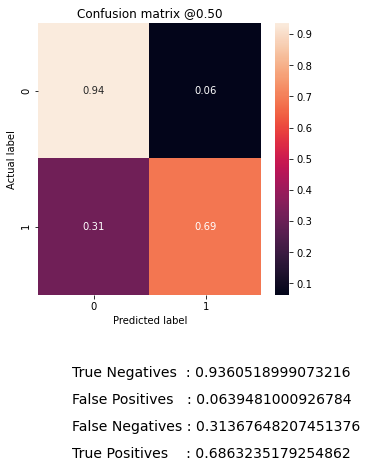

In [20]:
plot_cm(Y_test, test_predictions)

In [13]:
print(classification_report(Y_test, test_predictions.round()))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80      9711
           1       0.93      0.69      0.79     12803

    accuracy                           0.79     22514
   macro avg       0.81      0.81      0.79     22514
weighted avg       0.83      0.79      0.79     22514



In [14]:
from sklearn.metrics import roc_curve, auc

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


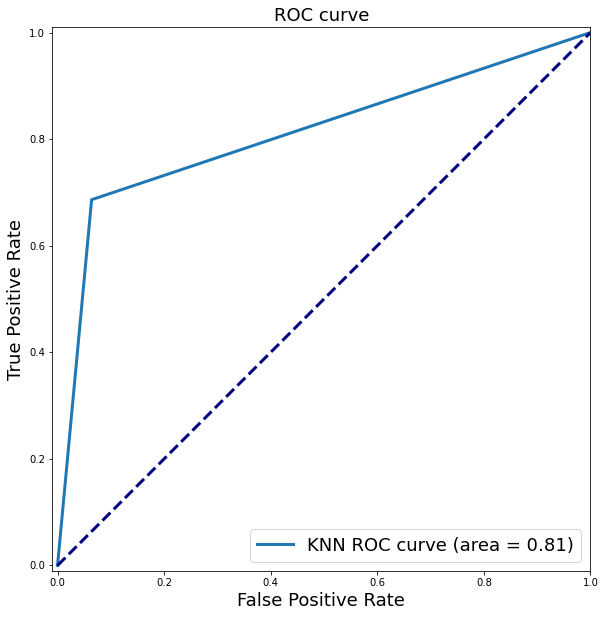

In [16]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend(loc='lower right', fontsize=18)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [16]:
estimator.get_params()

{'build_fn': <function __main__.neural_network(optimizer='Adagrad', init='glorot_uniform')>}

In [19]:
optimizers = ['sgd','rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([50, 100, 150,200])
batches = np.array([32,64,128,256,512])
#param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init=init)
param_grid = dict(nb_epoch=epochs, batch_size=batches)

optimal_params = GridSearchCV(
    estimator = estimator,
    param_grid = param_grid,
    cv=2,
    scoring ='accuracy',
    verbose = 2)
optimal_params.fit(X_train,Y_train)
print(optimal_params.best_params_)


Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] batch_size=32, nb_epoch=50 ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/1
57162/57162 [==============================] - 6s 113us/step - loss: 3.8412e-04 - accuracy: 0.9979 - precision: 0.9987 - recall: 0.9963 - auc: 0.9997
[CV] ....................... batch_size=32, nb_epoch=50, total=   8.5s
[CV] batch_size=32, nb_epoch=50 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


Epoch 1/1
57162/57162 [==============================] - 6s 109us/step - loss: 4.0823e-04 - accuracy: 0.9979 - precision: 0.9987 - recall: 0.9963 - auc: 0.9997
[CV] ....................... batch_size=32, nb_epoch=50, total=   8.3s
[CV] batch_size=32, nb_epoch=100 .....................................
Epoch 1/1
57162/57162 [==============================] - 6s 108us/step - loss: 3.9084e-04 - accuracy: 0.9979 - precision: 0.9987 - recall: 0.9963 - auc: 0.9997
[CV] ...................... batch_size=32, nb_epoch=100, total=   8.2s
[CV] batch_size=32, nb_epoch=100 .....................................
Epoch 1/1
57162/57162 [==============================] - 6s 112us/step - loss: 3.6749e-04 - accuracy: 0.9980 - precision: 0.9987 - recall: 0.9963 - auc: 0.9997
[CV] ...................... batch_size=32, nb_epoch=100, total=   8.6s
[CV] batch_size=32, nb_epoch=150 .....................................
Epoch 1/1
57162/57162 [==============================] - 6s 110us/step - loss: 3.9751e-04 - ac

57162/57162 [==============================] - 2s 32us/step - loss: 0.0033 - accuracy: 0.9980 - precision: 0.9986 - recall: 0.9963 - auc: 0.9997
[CV] ..................... batch_size=256, nb_epoch=150, total=   3.2s
[CV] batch_size=256, nb_epoch=150 ....................................
Epoch 1/1
57162/57162 [==============================] - 2s 32us/step - loss: 0.0032 - accuracy: 0.9980 - precision: 0.9985 - recall: 0.9963 - auc: 0.9997
[CV] ..................... batch_size=256, nb_epoch=150, total=   3.2s
[CV] batch_size=256, nb_epoch=200 ....................................
Epoch 1/1
57162/57162 [==============================] - 2s 30us/step - loss: 0.0031 - accuracy: 0.9980 - precision: 0.9985 - recall: 0.9963 - auc: 0.9997
[CV] ..................... batch_size=256, nb_epoch=200, total=   3.1s
[CV] batch_size=256, nb_epoch=200 ....................................
Epoch 1/1
57162/57162 [==============================] - 2s 31us/step - loss: 0.0031 - accuracy: 0.9980 - precision: 0.

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.3min finished


RuntimeError: Cannot clone object <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000018B05539908>, as the constructor either does not set or modifies parameter batch_size

In [ ]:
def plot_metrics(history):
  metrics =  ['accuracy', 'precision', 'recall','auc']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplots(2,2)
    plt.plot(history.epochs,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epochs, history.history['val_'+metric], color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'accuracy':
      plt.ylim([0.8,1])
    elif metric == 'precision':
      plt.ylim([0.8,1])
    elif metric == 'recall':
      plt.ylim([0.8,1])

    plt.legend()
    
plot_metrics(estimator)